In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert, welch
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
np.random.seed(42)

In [3]:
for dirname, _, filenames in os.walk('datasets1'):
    dataFile_quant = np.empty(len(filenames), dtype='object')
    for ii, filename in enumerate(filenames, start=0):
        dataFile_quant[ii] = (os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

ps_0.4_phases_80_snr_25.csv
datasets1\fileID_10020907_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_27.csv
datasets1\fileID_10020908_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_29.csv
datasets1\fileID_10021001_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_15.csv
datasets1\fileID_10021002_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_17.csv
datasets1\fileID_10021003_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_19.csv
datasets1\fileID_10021004_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_21.csv
datasets1\fileID_10021005_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_23.csv
datasets1\fileID_10021006_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_25.csv
datasets1\fileID_10021007_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_27.csv
datasets1\fileID_10021008_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_29.csv
datasets1\fileID_10030101_INL_0000000_freq_14000000_amps_0.5_phases_0_snr_15.csv
datasets1\fileID_10030102_INL_0000000_freq_14000000_amps_0.5_phases_0_s

In [4]:
featuresDF = pd.DataFrame(columns=['time', 'signal', 'inPhase', 'quadrature', 'frequency', 'amplitude', 'phase', 'snr'])
for ii in range(len(dataFile_quant)):
    df_time = np.transpose(np.array(pd.read_csv(dataFile_quant[ii], header= None, usecols=[0], dtype='float64')))[0]
    df_gen = np.transpose(np.array(pd.read_csv(dataFile_quant[ii], header= None, usecols=[1], dtype='float64')))[0]
    analytical_data = hilbert(df_gen)
    df_ip = analytical_data.real
    df_quad = analytical_data.imag
    df_freq  = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[5])
    df_amp   = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[7])
    df_phase = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[9])
    df_snr =   int(os.path.split(dataFile_quant[867])[1].split('.csv')[0].split('_')[11])
    featuresDF = featuresDF.append({'time': df_time,
                                    'signal': df_gen, 
                                    'inPhase': df_ip, 'quadrature': df_quad,
                                    'frequency': df_freq,
                                    'amplitude': df_amp, 'phase': df_phase,
                                    'snr': df_snr}, ignore_index=True)

#featuresDF['frequency'] = pd.to_numeric(featuresDF['frequency'])
featuresDF['snr'] = pd.to_numeric(featuresDF['snr'])
print(featuresDF.head())
print("\nData Types")
print(featuresDF.dtypes)

                                                time  \
0  [0.0, 5.00250125062531e-09, 1.0005002501250601...   
1  [0.0, 5.00250125062531e-09, 1.0005002501250601...   
2  [0.0, 5.00250125062531e-09, 1.0005002501250601...   
3  [0.0, 5.00250125062531e-09, 1.0005002501250601...   
4  [0.0, 5.00250125062531e-09, 1.0005002501250601...   

                                              signal  \
0  [-0.0416250886115178, 0.0546672468762201, 0.13...   
1  [0.0445799213276981, 0.0414318420560583, 0.019...   
2  [-0.0072194418140698, 0.07297954635713601, 0.1...   
3  [-0.00822477963741264, 0.0529785273385114, 0.0...   
4  [-0.0345947578033688, 0.0281255687052605, 0.05...   

                                             inPhase  \
0  [-0.0416250886115178, 0.05466724687622012, 0.1...   
1  [0.0445799213276981, 0.041431842056058314, 0.0...   
2  [-0.007219441814069814, 0.07297954635713602, 0...   
3  [-0.008224779637412635, 0.0529785273385114, 0....   
4  [-0.0345947578033688, 0.02812556870526052, 

In [ ]:
featuresDF.to_pickle('dataFrames/featuresDF1.p')

In [4]:
featuresDF = pd.read_pickle('dataFrames/featuresDF1.p')
print(featuresDF.head())

                                                time  \
0  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
1  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
2  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
3  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
4  [0.0, 5.0025012506253105e-09, 1.00050025012506...   

                                              signal  \
0  [-0.0416250886115178, 0.0546672468762201, 0.13...   
1  [0.0445799213276981, 0.0414318420560583, 0.019...   
2  [-0.0072194418140698, 0.072979546357136, 0.118...   
3  [-0.0082247796374126, 0.0529785273385114, 0.09...   
4  [-0.0345947578033688, 0.0281255687052605, 0.05...   

                                             inPhase  \
0  [-0.0416250886115178, 0.05466724687622012, 0.1...   
1  [0.044579921327698106, 0.0414318420560583, 0.0...   
2  [-0.007219441814069803, 0.07297954635713601, 0...   
3  [-0.008224779637412607, 0.05297852733851139, 0...   
4  [-0.03459475780336879, 0.02812556870526052,

In [5]:
fs = 200e6        # Simulation sampling rate (Hz)
fs_adc = 100e6    # ADC sampling rate (Hz)
t_end = 1e-5     # Simulation end time (seconds)
t = np.linspace(0, t_end, int(fs*t_end))
print("There are {} elements per sample".format(len(t)))

There are 2000 elements per sample


In [6]:
# Which Figure to show for examples
showFig = 4

Signal Frequency: 4000000.0
Signal Amplitude: 0.3
Signal Phase:     0.0


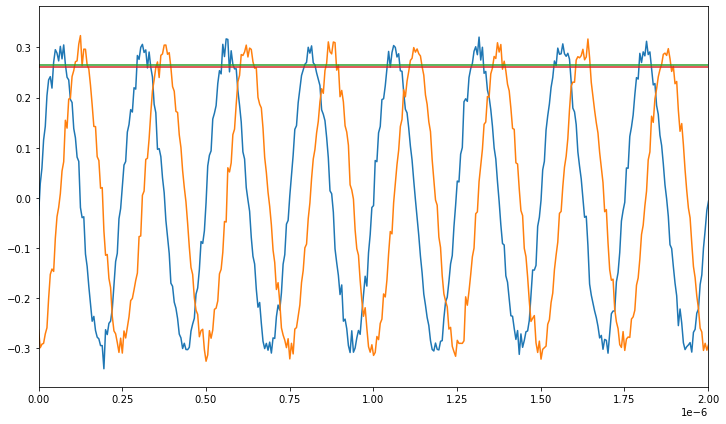

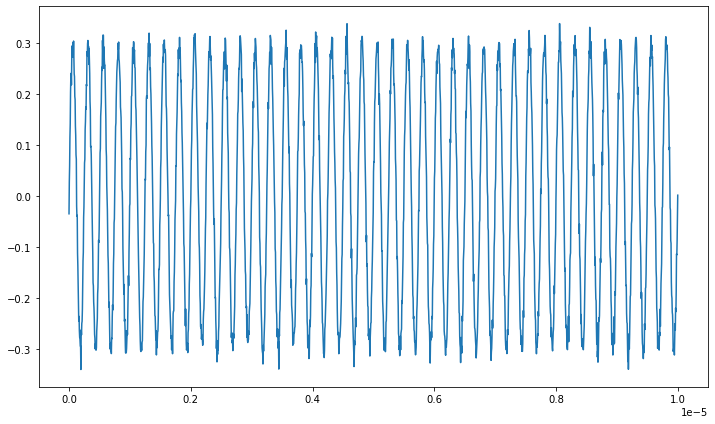

In [7]:
#IQ Data testing
def FilteredSignal(signal, fs, cutoff):
    B, A = butter(1, cutoff / (fs / 2), btype='low')
    filtered_signal = filtfilt(B, A, signal, axis=0)
    return filtered_signal

time = featuresDF.at[showFig, 'time']
testdata = featuresDF.at[showFig, 'signal']
cutoff = featuresDF.at[showFig, 'frequency']
analytical_testdata = hilbert(testdata)
amplitudeEnvelope = np.abs(analytical_testdata)
filteredSignal = FilteredSignal(amplitudeEnvelope, fs, cutoff)

print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.xlim(0,2e-6)
plt.plot(time, analytical_testdata.real)
plt.plot(time, analytical_testdata.imag)
plt.plot(amplitudeEnvelope)
plt.plot(filteredSignal)

plt.figure(figsize=(12,7))
plt.plot(time, testdata)

In [8]:
iq_sig = featuresDF.at[showFig, 'inPhase']*np.cos(2*np.pi*fs*t) - featuresDF.at[showFig, 'quadrature']*np.sin(2*np.pi*fs*t)

Signal Frequency: 4000000.0
Signal Amplitude: 0.3
Signal Phase:     0.0


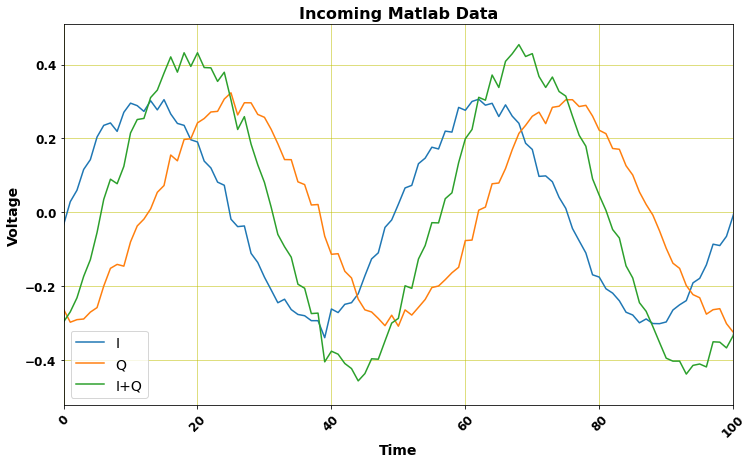

In [9]:
print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.plot(featuresDF.at[showFig, 'inPhase'])
plt.plot(featuresDF.at[showFig, 'quadrature'])
plt.plot(featuresDF.at[showFig, 'inPhase'] + featuresDF.at[showFig, 'quadrature'])
plt.legend(['I', 'Q', 'I+Q'], loc='lower left', prop={'size': 14})
plt.title('Incoming Matlab Data', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('Voltage', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)
plt.xlim(0,100)
plt.show()

Signal Frequency: 4000000.0
Signal Amplitude: 0.3
Signal Phase:     0.0


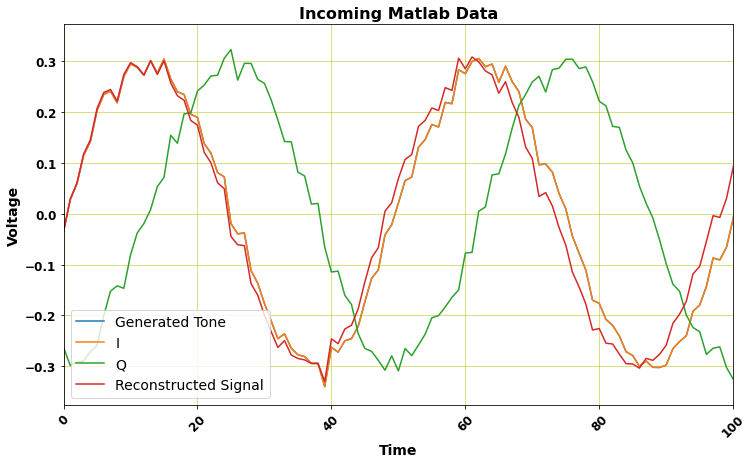

In [10]:
print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.plot(featuresDF.at[showFig, 'signal'])
plt.plot(featuresDF.at[showFig, 'inPhase'])
plt.plot(featuresDF.at[showFig, 'quadrature'])
plt.plot(iq_sig)
plt.legend(['Generated Tone', 'I', 'Q', 'Reconstructed Signal'], loc='lower left', prop={'size': 14})
plt.title('Incoming Matlab Data', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('Voltage', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)
plt.xlim(0,100)
plt.show()

Signal Frequency: 4000000.0
Signal Amplitude: 0.3
Signal Phase:     0.0


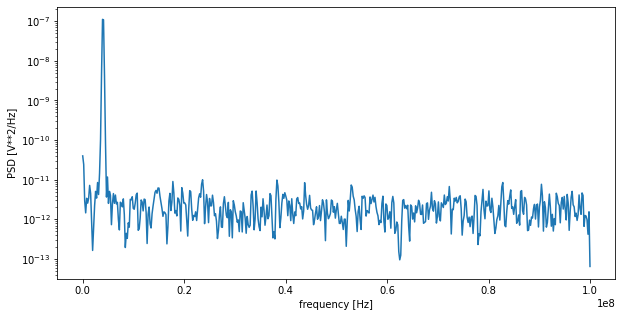

In [11]:
f, Pxx_den = welch(featuresDF.at[showFig,'signal'], fs, nperseg=1024)

print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(10,5))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape data
signal_df_r = featuresDF
signal_df_r['iq'] = ''
for ii in range(0, len(signal_df_r)):
    signal_sample = signal_df_r.at[ii,'signal']
    i_sample = signal_df_r.at[ii,'inPhase']
    q_sample = signal_df_r.at[ii,'quadrature']

    # Normalize the dataset
    signal_sample = np.asarray(signal_sample).reshape(-1,1)
    i_sample = np.asarray(i_sample).reshape(-1,1)
    q_sample = np.asarray(q_sample).reshape(-1,1)

    signal_sample = scaler.fit_transform(signal_sample)
    #i_sample = scaler.fit_transform(i_sample)
    #q_sample = scaler.fit_transform(q_sample)

    #signal_sample = signal_sample.reshape(width, height, 1)
    #signal_sample = signal_sample.reshape(50, 40, 1)
    signal_df_r.at[ii,'signal'] = np.array(signal_sample).squeeze()

    iq_sample = np.concatenate([i_sample, q_sample], axis=1)

    #iq_sample = signal_sample.reshape((iq_sample.shape[0], iq_sample.shape[1], 1))
    iq_sample = np.expand_dims(iq_sample, 2)
    signal_df_r.at[ii,'iq'] = np.array(iq_sample)

In [13]:
print(signal_df_r.shape)
print(signal_df_r.at[showFig,'iq'].shape)

(6400, 9)
(2000, 2, 1)


In [14]:
#Split the dataset 
from sklearn.model_selection import train_test_split 
train_df, test_validation_df = train_test_split(signal_df_r, train_size=0.8, test_size=0.2, random_state = 42, shuffle=True)
valid_df, test_df = train_test_split(test_validation_df, train_size=0.5, test_size=0.5, random_state = 42, shuffle=True)
print("Shape of train inputs {}, train target {}".format(train_df['signal'].iloc[0].shape, train_df.shape))
print("Shape of validation inputs {}, validation target {}".format(valid_df['signal'].iloc[0].shape, valid_df.shape))
print("Shape of test inputs {}, test target {}".format(test_df['signal'].iloc[0].shape, test_df.shape))

Shape of train inputs (2000,), train target (5120, 9)
Shape of validation inputs (2000,), validation target (640, 9)
Shape of test inputs (2000,), test target (640, 9)


In [15]:
train_features = np.array(train_df.iq.to_list()).squeeze()
valid_features = np.array(valid_df.iq.to_list()).squeeze()
test_features = np.array(test_df.iq.to_list()).squeeze()

train_labels = np.array(train_df.frequency.to_list())/10e5
valid_labels = np.array(valid_df.frequency.to_list())/10e5
test_labels = np.array(test_df.frequency.to_list())/10e5

In [16]:
#Import TensorFlow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, \
                                    ReLU, LeakyReLU, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

#ADDED CONFIG OPTIONS FOR STABILTY
#TensorFlow allocating all of the GPU memory 
#to itself when it initialises the session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
#Reset Default graph - Needed only for Jupyter Notebook
tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(42)

In [17]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


In [18]:
# Model configuration
batch_size = 32
no_epochs = 300
verbosity = 1

In [19]:
modelType = "DNN"
modelName = "nanoConvPaper_v3.1.3"
logDir = "logging" + "\\" + modelType + "\\" + modelName

In [20]:
modelDir = 'models'
modelSaveFile = modelDir + "\\" + modelType + "\\" + modelName + '.h5'

In [39]:
#Initialize model

#Add Layers
#input_layer = normalizer
input_layer = Input(shape=(2000,2))

regressor = LSTM(1, return_sequences=False)(input_layer)
#regressor = Flatten()(input_layer)
#regressor = Dense(2)(regressor)
#regressor = LeakyReLU()(regressor)
#regressor = Dropout(0.5)(regressor)
#regressor = Dense(2)(regressor)
#regressor = LeakyReLU()(regressor)
#regressor = Dropout(0.25)(regressor)
#regressor = Dense(3)(regressor)
#regressor = LeakyReLU()(regressor)
#regressor = Flatten()(regressor)

freq_extract = Dense(1, activation=None, name='freq_extract')(regressor)

In [40]:
#Using Keras Model class
model = Model(inputs=input_layer,
              outputs=freq_extract) #Output layer added

In [41]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2000, 2)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 1)                 16        
_________________________________________________________________
freq_extract (Dense)         (None, 1)                 2         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


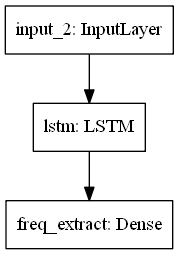

In [42]:
plot_model(model)

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
#optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

In [44]:
model.compile(
            optimizer=optimizer, 
            loss='mse'
            #metrics=['accuracy']
            )

In [45]:
es = EarlyStopping(monitor='val_loss', #do not change
                   mode='min',  #do not change
                   min_delta=.01,
                   verbose=1, # allows you to see more info per epoch
                   patience=20) # **** patience is how many validations to wait with nothing learned (patience * validation_freq)

mc = ModelCheckpoint(modelSaveFile, 
                     monitor='val_loss', 
                     mode='min', 
                     verbose=1, 
                     save_best_only=True)

In [46]:
#Setup Logging
logDir = "logging" + "\\" + modelType + "\\" + modelName + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=logDir)

#Train the model
history = model.fit(
                train_features, train_labels,
                validation_data=(valid_features, valid_labels),
                epochs=no_epochs,
                callbacks=[tensorboard, es, mc],
                batch_size=batch_size,
                shuffle=True,
                verbose=verbosity)

Epoch 1/300
160/160 [==============================] - ETA: 0s - loss: 17.0904
Epoch 00001: val_loss improved from inf to 9.47612, saving model to models\DNN\nanoConvPaper_v3.1.3.h5
160/160 [==============================] - 21s 129ms/step - loss: 17.0904 - val_loss: 9.4761
Epoch 2/300
160/160 [==============================] - ETA: 0s - loss: 7.9506
Epoch 00002: val_loss improved from 9.47612 to 8.45244, saving model to models\DNN\nanoConvPaper_v3.1.3.h5
160/160 [==============================] - 18s 114ms/step - loss: 7.9506 - val_loss: 8.4524
Epoch 3/300
160/160 [==============================] - ETA: 0s - loss: 7.0264
Epoch 00003: val_loss improved from 8.45244 to 6.94886, saving model to models\DNN\nanoConvPaper_v3.1.3.h5
160/160 [==============================] - 18s 112ms/step - loss: 7.0264 - val_loss: 6.9489
Epoch 4/300
160/160 [==============================] - ETA: 0s - loss: 6.3779
Epoch 00004: val_loss did not improve from 6.94886
160/160 [==============================] -

KeyboardInterrupt: 

In [ ]:
# Plot history: MSE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.semilogy()
plt.title('MSE for Frequency Estimation Model')
plt.ylabel('MSE value (log)')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logDir}

In [36]:
model = load_model(modelSaveFile)

In [37]:
freq_pred = model.predict(test_features)

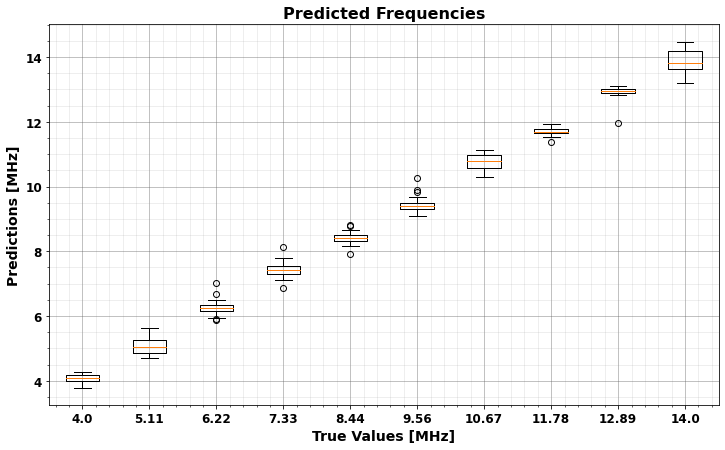

In [38]:
results = []
names = []
for freqs in np.unique(test_labels):
    results.append(freq_pred[np.where(test_labels == freqs)[0]].flatten())
    names.append(freqs.round(2))
fig = plt.figure(figsize =(12, 7)) 
ax = fig.add_subplot(111)
bp = ax.boxplot(results)
plt.yticks(weight='bold', fontsize=12)
ax.set_xticklabels(names, weight='bold', fontsize=12)
plt.title('Predicted Frequencies', weight='bold', fontsize=16)
plt.xlabel('True Values [MHz]', weight='bold', fontsize=14)
plt.ylabel('Predictions [MHz]', weight='bold', fontsize=14)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show(bp)

plt.figure(figsize =(10, 7)) 
plt.scatter(test_freq_val, freq_pred)
plt.xlabel('True Values [frequency]')
plt.ylabel('Predictions [frequency]')

In [142]:
mae = metrics.mean_absolute_error(test_labels, freq_pred)
mse = metrics.mean_squared_error(test_labels, freq_pred)
r2 = metrics.r2_score(test_labels, freq_pred)

print('R^2: ', r2)
print('MAE: ', mae)
print('MSE: ', mse)

R^2:  0.9995419687791254
MAE:  0.05086783444148442
MSE:  0.004818537425319383


In [143]:
for num in np.arange(10):
    print("Predicted frequency {}: {},  Actual Frequency {}: {}".format(num, round(float(freq_pred[num][0]),3), num, test_labels[num].round(3)))
#print("Predicted frequency 21: {}, Actual Frequency 21: {}".format(round(float(freq_pred[21][0]),3), test_freq_val[21].round(3)))

Predicted frequency 0: 4.052,  Actual Frequency 0: 4.0
Predicted frequency 1: 6.146,  Actual Frequency 1: 6.222
Predicted frequency 2: 7.417,  Actual Frequency 2: 7.333
Predicted frequency 3: 14.045,  Actual Frequency 3: 14.0
Predicted frequency 4: 5.216,  Actual Frequency 4: 5.111
Predicted frequency 5: 3.946,  Actual Frequency 5: 4.0
Predicted frequency 6: 10.793,  Actual Frequency 6: 10.667
Predicted frequency 7: 8.519,  Actual Frequency 7: 8.444
Predicted frequency 8: 8.492,  Actual Frequency 8: 8.444
Predicted frequency 9: 10.708,  Actual Frequency 9: 10.667


In [144]:
closeness_1 = np.zeros(len(freq_pred))
for ii in range(len(freq_pred)):
    if freq_pred[ii][0].round(1) == test_labels[ii].round(1):
        closeness_1[ii] = 1
freq_closeness = (np.count_nonzero(closeness_1)/len(freq_pred))*100
print('Frequency predictions on the test set were accurate to 1 decimal place by %{}'.format(round(freq_closeness,2)))

Frequency predictions on the test set were accurate to 1 decimal place by %13.12


In [145]:
avg_accuracy = np.zeros((len(freq_pred),2))
for ii in range(len(freq_pred)):
    avg_accuracy[ii,0] = test_labels[ii] - freq_pred[ii][0]
    avg_accuracy[ii,1] = (test_labels[ii] - freq_pred[ii][0]) / test_labels[ii] * 100

print('Average Frequency Differed by {}Hz which was %{}'.format(avg_accuracy.mean(axis=0)[0].round(2), avg_accuracy.mean(axis=0)[1]))

Average Frequency Differed by -0.01Hz which was %-0.16679811871171388


In [146]:
freq_pred_train = model.predict(train_features)

In [147]:
for num in np.arange(10):
    print("Predicted frequency {}: {},  Actual Frequency {}: {}".format(num, round(float(freq_pred_train[num][0]),3), num, train_labels[num].round(3)))

Predicted frequency 0: 6.202,  Actual Frequency 0: 6.222
Predicted frequency 1: 9.539,  Actual Frequency 1: 9.556
Predicted frequency 2: 12.915,  Actual Frequency 2: 12.889
Predicted frequency 3: 8.451,  Actual Frequency 3: 8.444
Predicted frequency 4: 12.947,  Actual Frequency 4: 12.889
Predicted frequency 5: 14.044,  Actual Frequency 5: 14.0
Predicted frequency 6: 11.749,  Actual Frequency 6: 11.778
Predicted frequency 7: 13.989,  Actual Frequency 7: 14.0
Predicted frequency 8: 3.938,  Actual Frequency 8: 4.0
Predicted frequency 9: 11.776,  Actual Frequency 9: 11.778


In [148]:
closeness_1 = np.zeros(len(freq_pred_train))
for ii in range(len(freq_pred_train)):
    if freq_pred_train[ii][0].round(1) == train_labels[ii].round(1):
        closeness_1[ii] = 1
freq_closeness = (np.count_nonzero(closeness_1)/len(freq_pred_train))*100
print('Frequency predictions on the test set were accurate to 1 decimal place by %{}'.format(round(freq_closeness,2)))

Frequency predictions on the test set were accurate to 1 decimal place by %12.23


In [149]:
avg_accuracy = np.zeros((len(freq_pred_train),2))
for ii in range(len(train_labels)):
    avg_accuracy[ii,0] = train_labels[ii] - freq_pred_train[ii][0]
    avg_accuracy[ii,1] = (train_labels[ii] - freq_pred_train[ii][0]) / train_labels[ii] * 100

print('Average Frequency Differed by {}Hz which was %{}'.format(avg_accuracy.mean(axis=0)[0].round(2), avg_accuracy.mean(axis=0)[1]))

Average Frequency Differed by -0.01Hz which was %-0.18976882234657064
